In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
heart_data = pd.read_csv("D:/heart/heart_disease_data.csv")

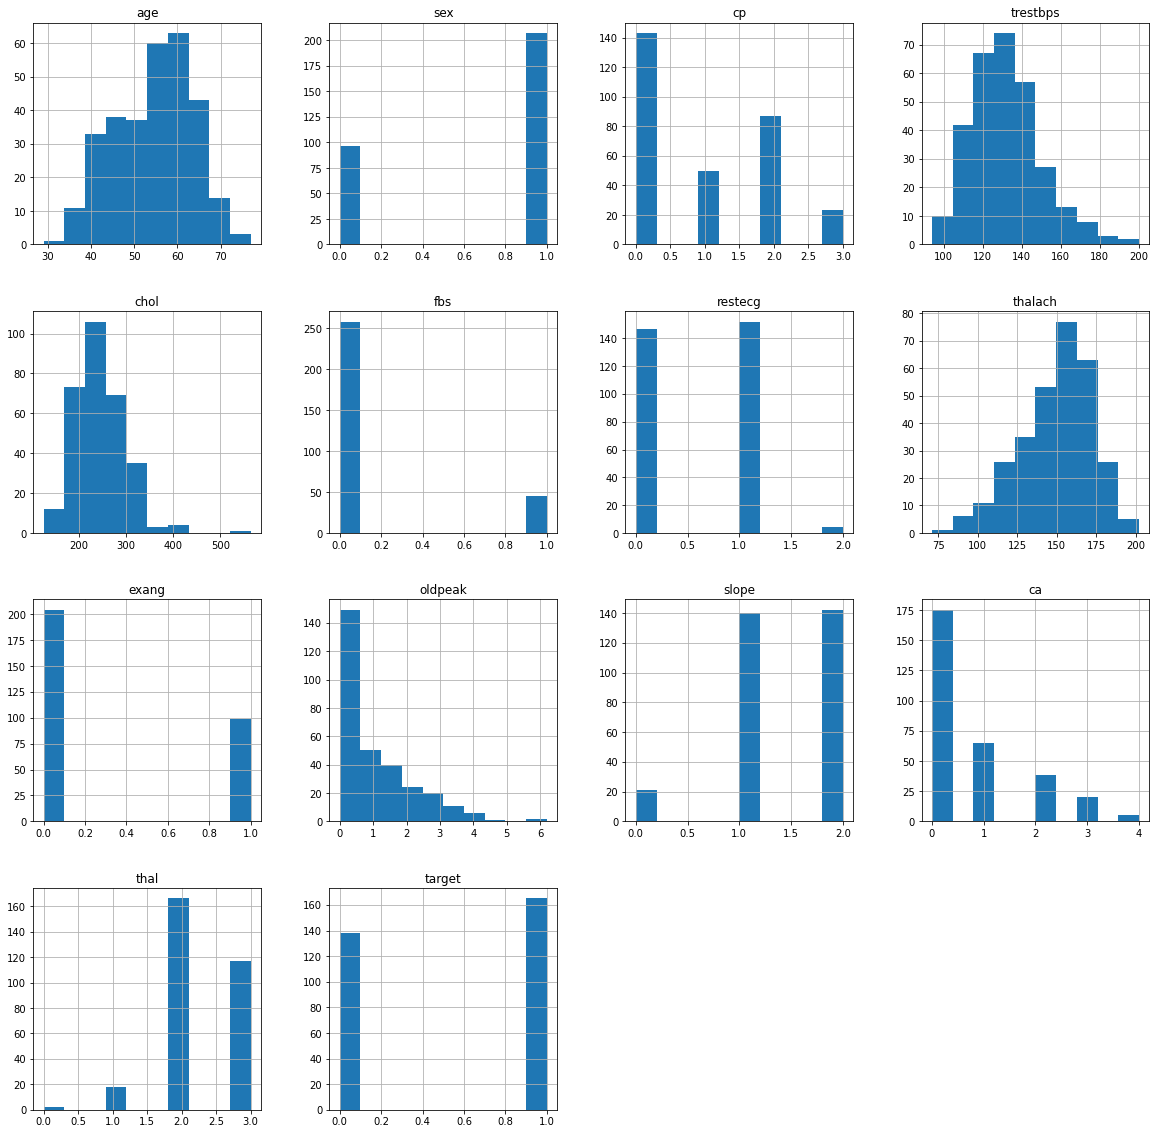

In [76]:
heart_data.hist(figsize=(20,20))
plt.show()

In [77]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [79]:
heart_data.shape

(303, 14)

In [80]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [82]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

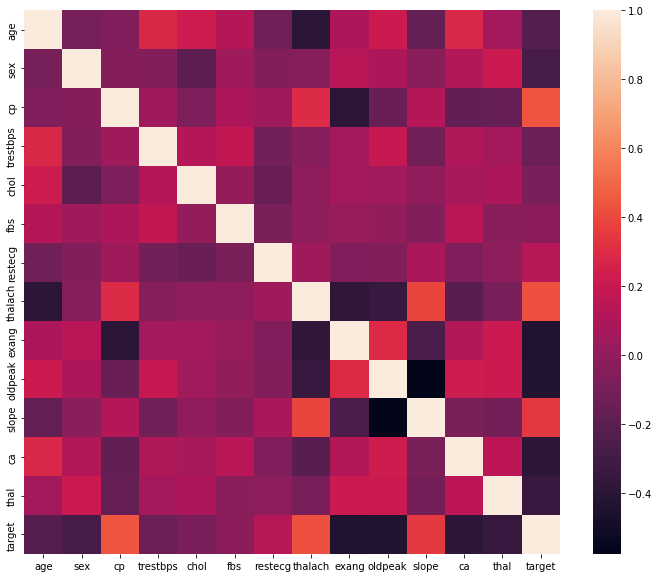

In [83]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_data.corr())

In [84]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [85]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [86]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [87]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [89]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# LOGISTIC REGRESSION

In [90]:
log=LogisticRegression()
log.fit(X_train,Y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
Y_pred1 = log.predict(X_test)

In [92]:
accuracy_score(Y_test,Y_pred1)

0.819672131147541

In [93]:
precision_score(Y_test,Y_pred1)

0.84375

In [94]:
recall_score(Y_test,Y_pred1)

0.8181818181818182

In [95]:
f1_score(Y_test,Y_pred1)

0.8307692307692308

# DECISION TREE 

In [96]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [97]:
Y_pred2 = dt.predict(X_test)

In [98]:
accuracy_score(Y_test,Y_pred2)

0.7868852459016393

In [99]:
precision_score(Y_test,Y_pred2)

0.7941176470588235

In [100]:
recall_score(Y_test,Y_pred2)

0.8181818181818182

In [101]:
f1_score(Y_test,Y_pred2)

0.8059701492537314

# RANDOM FOREST

In [102]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [103]:
Y_pred3 = rf.predict(X_test)

In [104]:
accuracy_score(Y_test,Y_pred3)

0.7540983606557377

In [105]:
precision_score(Y_test,Y_pred3)

0.78125

In [106]:
recall_score(Y_test,Y_pred3)

0.7575757575757576

In [107]:
f1_score(Y_test,Y_pred3)

0.7692307692307692

# SVM(SUPPORT VECTOR MACHINE)

In [108]:
svm = SVC()  
svm.fit(X_train, Y_train) 

SVC()

In [109]:
Y_pred4 = svm.predict(X_test)

In [110]:
accuracy_score(Y_test,Y_pred4)

0.6229508196721312

In [111]:
precision_score(Y_test,Y_pred4)

0.625

In [112]:
recall_score(Y_test,Y_pred4)

0.7575757575757576

In [113]:
f1_score(Y_test,Y_pred4)

0.6849315068493151

# KNN CLASSIFIER

In [114]:
knn= KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [115]:
Y_pred5 = knn.predict(X_test)

In [116]:
accuracy_score(Y_test,Y_pred5)

0.6229508196721312

In [117]:
precision_score(Y_test,Y_pred5)

0.6470588235294118

In [118]:
recall_score(Y_test,Y_pred5)

0.6666666666666666

In [119]:
f1_score(Y_test,Y_pred5)

0.6567164179104478

# NAIVE_BAYES

In [120]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [121]:
Y_pred6 = gnb.predict(X_test)

In [122]:
accuracy_score(Y_test,Y_pred6)

0.819672131147541

In [123]:
precision_score(Y_test,Y_pred6)

0.8928571428571429

In [124]:
recall_score(Y_test,Y_pred6)

0.7575757575757576

In [125]:
f1_score(Y_test,Y_pred6)

0.819672131147541

In [126]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','SVM','KNN','NB'],"ACC":[accuracy_score(Y_test,Y_pred1)*100,
                                                                             accuracy_score(Y_test,Y_pred2)*100,
                                                                             accuracy_score(Y_test,Y_pred3)*100,
                                                                             accuracy_score(Y_test,Y_pred4)*100,
                                                                             accuracy_score(Y_test,Y_pred5)*100,
                                                                             accuracy_score(Y_test,Y_pred6)*100]})

In [127]:
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

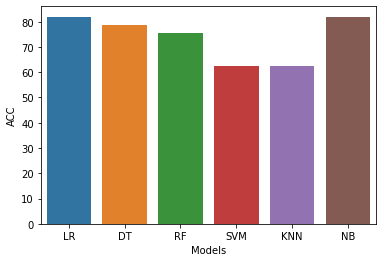

In [128]:
sns.barplot(final_data['Models'],final_data['ACC'])